## Awal

In [ ]:
import numpy as np

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [ ]:
source_path = '/content/drive/MyDrive/Datasetdsp'

source_path_healty = os.path.join(source_path, 'Healthy')
source_path_parkinson = os.path.join(source_path, 'Parkinson')


print(f"There are {len(os.listdir(source_path_healty))} images of Healty.")
print(f"There are {len(os.listdir(source_path_parkinson))} images of Parkinson.")


_1_files = os.listdir(source_path_healty)
print(_1_files[:10])

_2_files = os.listdir(source_path_parkinson)
print(_2_files[:10])


There are 1632 images of Healty.
There are 1632 images of Parkinson.
['Healthy218.png', 'Healthy421.png', 'Healthy240.png', 'Healthy345.png', 'Healthy467.png', 'Healthy460.png', 'Healthy624.png', 'Healthy350.png', 'Healthy295.png', 'Healthy828.png']
['Parkinson451.png', 'Parkinson741.png', 'Parkinson714.png', 'Parkinson573.png', 'Parkinson691.png', 'Parkinson861.png', 'Parkinson235.png', 'Parkinson835.png', 'Parkinson557.png', 'Parkinson886.png']


In [ ]:
def convert_to_jpg(input_path, output_path):
    try:
        img = Image.open(input_path)
        if img.format != 'JPEG':
            img = img.convert('RGB')
            img.save(output_path, 'JPEG', quality=95)
            os.remove(input_path)
            print(f"File {input_path} berhasil dikonversi ke JPEG: {output_path}")
    except Exception as e:
        print(f"Error dalam mengonversi file {input_path} ke JPEG: {e}")

def convert_folder_to_jpg_and_remove_original(source_path):
    for root, dirs, files in os.walk(source_path):
        for file in files:
            file_path = os.path.join(root, file)
            if file.lower().endswith(('.png', '.webp', '.jpeg')):
                output_path = os.path.splitext(file_path)[0] + '.jpg'
                convert_to_jpg(file_path, output_path)

# Definisikan path untuk setiap folder produk
source_paths = [
    source_path_healty, source_path_parkinson
]

# Lakukan konversi untuk setiap folder produk dan hapus file asli
for path in source_paths:
    convert_folder_to_jpg_and_remove_original(path)

In [ ]:
root_dir = '/content/drive/MyDrive/Datasetdsp/New'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  make_train_dir=os.path.join(root_dir,'training')
  make_validation_dir=os.path.join(root_dir,'validation')

  os.makedirs(make_train_dir)
  os.makedirs(make_validation_dir)

  train_1_dir=os.path.join(make_train_dir,'Healthy')
  train_2_dir=os.path.join(make_train_dir,'Parkinson')

  validation_1_dir=os.path.join(make_validation_dir,'Healthy')
  validation_2_dir=os.path.join(make_validation_dir,'Parkinson')


  os.makedirs(train_1_dir)
  os.makedirs(validation_1_dir)
  os.makedirs(train_2_dir)
  os.makedirs(validation_2_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Datasetdsp/New/training
/content/drive/MyDrive/Datasetdsp/New/validation
/content/drive/MyDrive/Datasetdsp/New/training/Healthy
/content/drive/MyDrive/Datasetdsp/New/training/Parkinson
/content/drive/MyDrive/Datasetdsp/New/validation/Healthy
/content/drive/MyDrive/Datasetdsp/New/validation/Parkinson


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  list_files=os.listdir(SOURCE_DIR)

  list_files=[
      list_file for list_file in list_files if os.path.getsize(os.path.join(SOURCE_DIR, list_file))>0
  ]

  split_size=int(len(list_files)*SPLIT_SIZE)

  training_file=list_files[:split_size]
  validation_file=list_files[split_size:]

  for file in training_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(TRAINING_DIR, file)
    copyfile(source_file,destination_file)

  for file in validation_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(VALIDATION_DIR, file)
    copyfile(source_file,destination_file)

In [ ]:
_1_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Healthy"
_2_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Parkinson"

TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

TRAINING_1_DIR = os.path.join(TRAINING_DIR, "Healthy/")
VALIDATION_1_DIR = os.path.join(VALIDATION_DIR, "Healthy/")

TRAINING_2_DIR = os.path.join(TRAINING_DIR, "Parkinson/")
VALIDATION_2_DIR = os.path.join(VALIDATION_DIR, "Parkinson/")


if len(os.listdir(TRAINING_1_DIR)) > 0:
  for file in os.scandir(TRAINING_1_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_2_DIR)) > 0:
  for file in os.scandir(TRAINING_2_DIR):
    os.remove(file.path)


split_size = .8

split_data(_1_SOURCE_DIR, TRAINING_1_DIR, VALIDATION_1_DIR, split_size)
split_data(_2_SOURCE_DIR, TRAINING_2_DIR, VALIDATION_2_DIR, split_size)



print(f"\n\nHealthy has {len(os.listdir(_1_SOURCE_DIR))} images\n")
print(f"Parkinson has {len(os.listdir(_2_SOURCE_DIR))} images\n")


print(f"There are {len(os.listdir(TRAINING_1_DIR))} images of Healthy")
print(f"There are {len(os.listdir(TRAINING_2_DIR))} images of Parkinson for training")


print(f"There are {len(os.listdir(VALIDATION_1_DIR))} images of Healthy")
print(f"There are {len(os.listdir(VALIDATION_2_DIR))} images of Parkinson Cream for validation")



Healthy has 1632 images

Parkinson has 1632 images

There are 1305 images of Healthy
There are 1305 images of Parkinson for training
There are 327 images of Healthy
There are 327 images of Parkinson Cream for validation


In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        target_size=(350, 350),
                                                        classes=['Healthy', 'Parkinson'])

    validation_datagen = ImageDataGenerator(rescale=1.0/255.)

    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(350, 350),
                                                                  classes=['Healthy', 'Parkinson'])

    return train_generator, validation_generator


## Exception as best model

In [ ]:
#base_model=tf.keras.applications.VGG19(include_top=False, weights="imagenet",input_tensor=Input(shape=(350,350,3)))
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(350, 350, 3)))


83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 350, 350, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 174, 174, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 174, 174, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 174, 174, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
base_model.trainable = False

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2610 images belonging to 2 classes.
Found 654 images belonging to 2 classes.


In [ ]:
# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
#     tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(2, activation='softmax')  # Ubah ke 2 unit dan aktivasi softmax untuk klasifikasi biner
# ])

# model.summary()

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Tingkat dropout yang lebih tinggi
    tf.keras.layers.Dense(128, activation='relu'),  # Lapisan Dense tambahan
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 11, 11, 2048)      20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        1179712   
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.94 and logs.get('val_accuracy') > 0.94 :
      self.model.stop_training = True

callbacks=myCallback()

total_sample = train_generator.n
n_batch = 64

history = model.fit(train_generator, epochs=50, validation_data=validation_generator, steps_per_epoch = int(total_sample/n_batch), callbacks=[callbacks])

Epoch 1/50
40/40 [==============================] - 142s 3s/step - loss: 0.6369 - accuracy: 0.6724 - val_loss: 0.4674 - val_accuracy: 0.7813
Epoch 2/50
40/40 [==============================] - 106s 3s/step - loss: 0.4656 - accuracy: 0.7879 - val_loss: 0.4159 - val_accuracy: 0.7982
Epoch 3/50
40/40 [==============================] - 105s 3s/step - loss: 0.4252 - accuracy: 0.8095 - val_loss: 0.3890 - val_accuracy: 0.8135
Epoch 4/50
40/40 [==============================] - 106s 3s/step - loss: 0.3946 - accuracy: 0.8299 - val_loss: 0.3484 - val_accuracy: 0.8440
Epoch 5/50
40/40 [==============================] - 105s 3s/step - loss: 0.3614 - accuracy: 0.8429 - val_loss: 0.3205 - val_accuracy: 0.8486
Epoch 6/50
40/40 [==============================] - 106s 3s/step - loss: 0.3512 - accuracy: 0.8472 - val_loss: 0.3179 - val_accuracy: 0.8700
Epoch 7/50
40/40 [==============================] - 103s 3s/step - loss: 0.3189 - accuracy: 0.8731 - val_loss: 0.4702 - val_accuracy: 0.7905
Epoch 8/50
40

## Model Evaluation

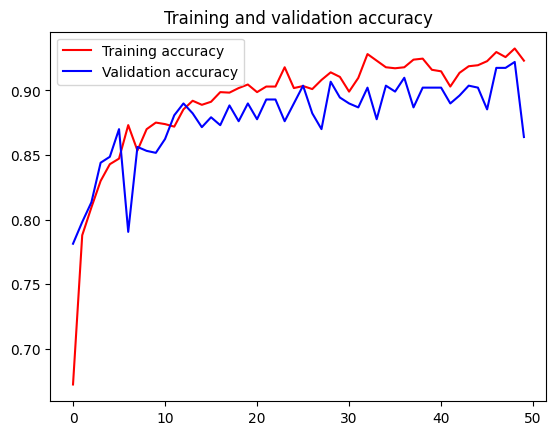

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

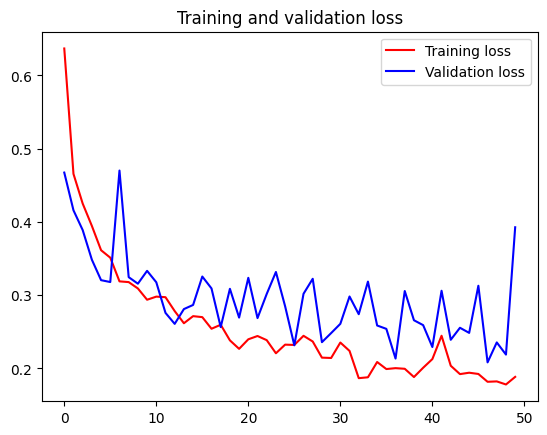

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
valid_loss, valid_accuracy = model.evaluate(validation_generator)
print("Akurasi model: {}".format(valid_accuracy))

21/21 [==============================] - 7s 307ms/step - loss: 0.3927 - accuracy: 0.8639
Akurasi model: 0.8639143705368042


In [ ]:
class_order = train_generator.class_indices
print("Urutan kelas:", class_order)

Urutan kelas: {'Healthy': 0, 'Parkinson': 1}


In [ ]:
model.save("model_parkinston.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Testing

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(350, 350))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Mendapatkan nilai probabilitas tertinggi dari hasil prediksi
    highest_prob = np.max(classes)

    # Mengatur Nilai Threshold
    threshold = 0.8

    # Daftar label yang sesuai dengan indeks prediksi
    labels = ['Healthy', 'Parkinson']

    if highest_prob >= threshold:
        # Jika probabilitas tertinggi melebihi atau sama dengan threshold, lanjutkan seperti sebelumnya
        predicted_label_index = np.argmax(classes)
        predicted_label = labels[predicted_label_index]
        print(fn)
        print(classes)
        print(f'Hasil prediksi produk: {predicted_label}')
    else:
        # Jika probabilitas tertinggi tidak memenuhi threshold
        print(f"{fn} Produk Tidak Terdeteksi")